<a href="https://colab.research.google.com/github/deen0104/CN6005-2526-T1-Artifical-Intelligence-/blob/main/week5Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical


In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

print("Train:", x_train.shape, " Test:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Train: (50000, 32, 32, 3)  Test: (10000, 32, 32, 3)


In [3]:
def cnn_with_pooling():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu', name="conv3"),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

model_pool = cnn_with_pooling()
model_pool.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_pool.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history_pool = model_pool.fit(
    x_train, y_train,
    epochs=5, batch_size=128,
    validation_split=0.1, verbose=1
)
test_loss, test_acc = model_pool.evaluate(x_test, y_test, verbose=0)
print(f"Model A (With Pooling) Accuracy: {test_acc:.4f}")


Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 60s 166ms/step - accuracy: 0.3086 - loss: 1.8485 - val_accuracy: 0.5130 - val_loss: 1.3539
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 82s 167ms/step - accuracy: 0.5294 - loss: 1.3155 - val_accuracy: 0.5844 - val_loss: 1.1914
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 82s 167ms/step - accuracy: 0.5957 - loss: 1.1417 - val_accuracy: 0.6124 - val_loss: 1.1197
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 59s 168ms/step - accuracy: 0.6444 - loss: 1.0156 - val_accuracy: 0.6512 - val_loss: 0.9871
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 58s 166ms/step - accuracy: 0.6761 - loss: 0.9166 - val_accuracy: 0.6824 - val_loss: 0.9181
Model A (With Pooling) Accuracy: 0.6679


In [5]:
def cnn_without_pooling():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.Conv2D(128, (3,3), activation='relu', name="conv3"),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

model_no_pool = cnn_without_pooling()
model_no_pool.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_no_pool.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,250 (42.61 MB)

 Trainable params: 11,170,250 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history_no_pool = model_no_pool.fit(
    x_train, y_train,
    epochs=5, batch_size=128,
    validation_split=0.1, verbose=1
)
test_loss2, test_acc2 = model_no_pool.evaluate(x_test, y_test, verbose=0)
print(f"Model B (No Pooling) Accuracy: {test_acc2:.4f}")


Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 563s 2s/step - accuracy: 0.3735 - loss: 1.7543 - val_accuracy: 0.6120 - val_loss: 1.1042
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 567s 2s/step - accuracy: 0.6467 - loss: 1.0053 - val_accuracy: 0.6716 - val_loss: 0.9365
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 561s 2s/step - accuracy: 0.7397 - loss: 0.7513 - val_accuracy: 0.6886 - val_loss: 0.9076
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 569s 2s/step - accuracy: 0.8322 - loss: 0.4930 - val_accuracy: 0.6890 - val_loss: 0.9896
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 619s 2s/step - accuracy: 0.9086 - loss: 0.2746 - val_accuracy: 0.6868 - val_loss: 1.1909
Model B (No Pooling) Accuracy: 0.6660


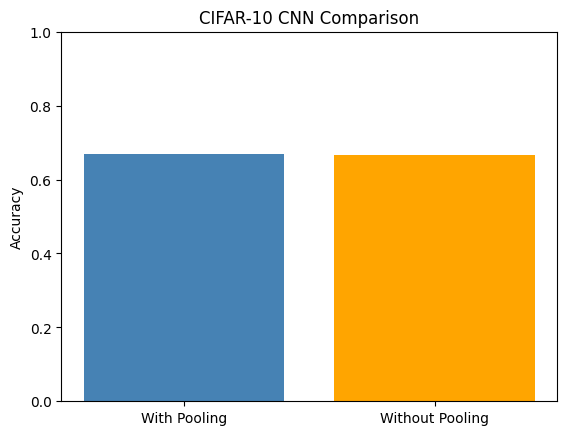

In [7]:
plt.bar(['With Pooling', 'Without Pooling'], [test_acc, test_acc2], color=['steelblue','orange'])
plt.ylabel('Accuracy')
plt.title('CIFAR-10 CNN Comparison')
plt.ylim(0,1)
plt.show()


In [8]:
def gradcam(model, img_array, class_index=None, last_conv_layer_name="conv3", eps=1e-8):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if class_index is None:
            class_index = tf.argmax(predictions[0])
        class_channel = predictions[:, class_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(conv_outputs, pooled_grads), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + eps)
    return heatmap.numpy()


In [9]:
def show_gradcam(img, heatmap, alpha=0.4, cmap='jet'):
    import matplotlib.cm as cm
    heatmap_resized = tf.image.resize(heatmap[..., np.newaxis], (img.shape[0], img.shape[1])).numpy().squeeze()
    colormap = cm.get_cmap(cmap)
    heatmap_color = colormap(heatmap_resized)[:, :, :3]
    overlay = (1-alpha)*img + alpha*heatmap_color
    overlay = np.clip(overlay, 0, 1)

    fig, axes = plt.subplots(1,3, figsize=(9,3))
    axes[0].imshow(img)
    axes[0].set_title("Input")
    axes[1].imshow(heatmap_resized, cmap='jet')
    axes[1].set_title("Grad-CAM")
    axes[2].imshow(overlay)
    axes[2].set_title("Overlay")
    for ax in axes: ax.axis('off')
    plt.tight_layout()
    plt.show()


In [12]:
def cnn_with_pooling():
    inputs = layers.Input(shape=(32, 32, 3))
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', name="conv3")(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = models.Model(inputs, outputs, name="cnn_with_pooling")
    return model


In [13]:
model_pool = cnn_with_pooling()
model_pool.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_pool.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.1)


Epoch 1/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 61s 168ms/step - accuracy: 0.3221 - loss: 1.8379 - val_accuracy: 0.5272 - val_loss: 1.3342
Epoch 2/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 58s 165ms/step - accuracy: 0.5326 - loss: 1.3210 - val_accuracy: 0.5870 - val_loss: 1.1690
Epoch 3/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 85s 173ms/step - accuracy: 0.6003 - loss: 1.1269 - val_accuracy: 0.6382 - val_loss: 1.0510


In [14]:
# Create a GradCAM-compatible model
grad_model = tf.keras.models.Model(
    [model_pool.input],
    [model_pool.get_layer('conv3').output, model_pool.output]
)


In [16]:
# Create a GradCAM-compatible version of your trained model
grad_model = tf.keras.models.Model(
    inputs=[model_pool.input],
    outputs=[model_pool.get_layer('conv3').output, model_pool.output]
)


In [22]:
def gradcam(model, img_array, class_index=None, last_conv_layer_name="conv3", eps=1e-8):
    # Get target convolutional layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [last_conv_layer.output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)

        # ✅ Handle case where predictions is a list
        if isinstance(predictions, (list, tuple)):
            predictions = predictions[-1]

        if class_index is None:
            class_index = tf.argmax(predictions[0])

        # ✅ Convert class_index to int and extract that class output
        class_index = int(class_index)
        class_channel = predictions[:, class_index]

    # Compute gradients
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Weight the conv maps
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(conv_outputs, pooled_grads), axis=-1)

    # Normalize
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + eps)
    return heatmap.numpy()


/tmp/ipython-input-1814228948.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap(cmap)


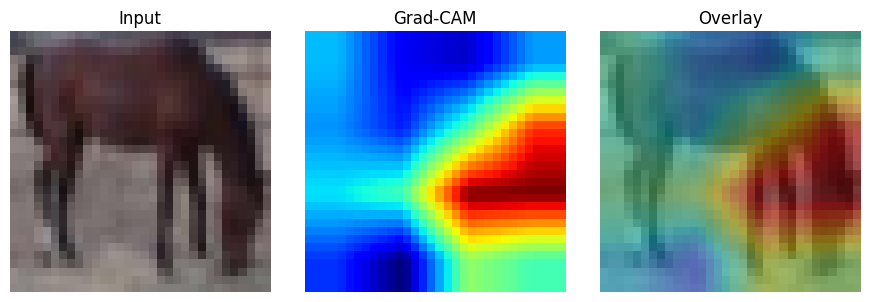

In [23]:
heatmap = gradcam(grad_model, img_batch, class_index=pred_class, last_conv_layer_name="conv3")
show_gradcam(img, heatmap)


In [25]:
def cnn_without_pooling():
    inputs = layers.Input(shape=(32, 32, 3))
    x = layers.Conv2D(32, (3,3), activation='relu')(inputs)
    x = layers.Conv2D(64, (3,3), activation='relu')(x)
    x = layers.Conv2D(128, (3,3), activation='relu', name="conv3")(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = models.Model(inputs, outputs, name="cnn_without_pooling")
    return model

model_no_pool = cnn_without_pooling()
model_no_pool.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_no_pool.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.1)


Epoch 1/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 576s 2s/step - accuracy: 0.3507 - loss: 1.8042 - val_accuracy: 0.5594 - val_loss: 1.2414
Epoch 2/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 620s 2s/step - accuracy: 0.5956 - loss: 1.1409 - val_accuracy: 0.6160 - val_loss: 1.0557
Epoch 3/3
352/352 ━━━━━━━━━━━━━━━━━━━━ 566s 2s/step - accuracy: 0.6857 - loss: 0.8886 - val_accuracy: 0.6760 - val_loss: 0.9388


In [26]:
# Evaluate both
acc_pool = model_pool.evaluate(x_test, y_test, verbose=0)[1]
acc_no_pool = model_no_pool.evaluate(x_test, y_test, verbose=0)[1]

print(f"Accuracy WITH pooling:  {acc_pool:.4f}")
print(f"Accuracy WITHOUT pooling: {acc_no_pool:.4f}")


Accuracy WITH pooling:  0.6291
Accuracy WITHOUT pooling: 0.6652


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_25']]
Received: inputs=Tensor(shape=(1, 32, 32, 3))
  warnings.warn(msg)
/tmp/ipython-input-1814228948.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap(cmap)


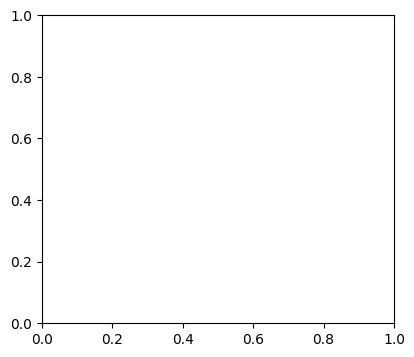

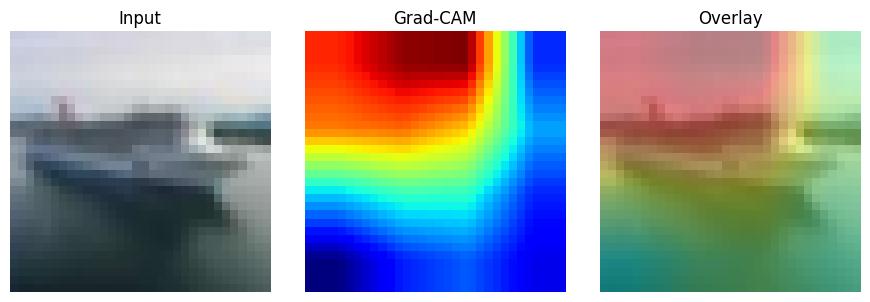

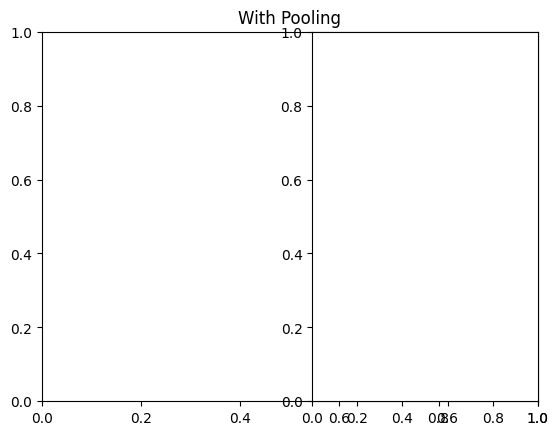

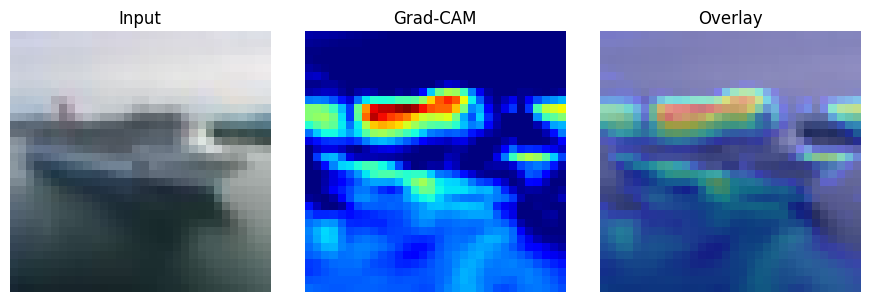

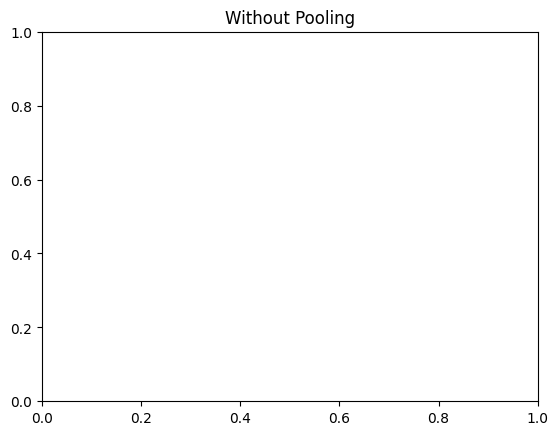

In [27]:
# Build GradCAM wrapper for the non-pooled model
grad_model_no_pool = tf.keras.models.Model(
    [model_no_pool.input],
    [model_no_pool.get_layer('conv3').output, model_no_pool.output]
)

# Pick one image
i = np.random.randint(0, len(x_test))
img = x_test[i]
img_batch = img[np.newaxis, ...]

# Grad-CAM for both models
heatmap_pool = gradcam(grad_model, img_batch, class_index=np.argmax(model_pool.predict(img_batch)), last_conv_layer_name="conv3")
heatmap_no_pool = gradcam(grad_model_no_pool, img_batch, class_index=np.argmax(model_no_pool.predict(img_batch)), last_conv_layer_name="conv3")

# Plot both results
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
show_gradcam(img, heatmap_pool)
plt.title("With Pooling")

plt.subplot(1,2,2)
show_gradcam(img, heatmap_no_pool)
plt.title("Without Pooling")
plt.show()
